In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline  

In [52]:
DataFolder = "LapData\\"

DataFile = DataFolder + "IWSC Daytona Race.csv"

DataFile

'LapData\\IWSC Daytona Race.csv'

In [55]:
df = pd.read_table(DataFile, sep = ",")
df = df.assign(dtLapTime = pd.to_datetime('0:0:' + df['Lap Time'] + '0', 
                               exact=False, errors='ignore', format = "%H:%M:%S.%f").apply(lambda x: x.time()))
df = df.assign(fLapTime = df.dtLapTime.apply(lambda x: ((x.hour*60+x.minute)*60+x.second)*1000000+x.microsecond)/1000000)
print(df.columns)
df.columns = ['Car', 'Class', 'Driver', 'Lap', 'strLapTime', 'Session Time', 'Flag',
              'Location', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08',
              'S09', 'S10', 'S11', 'S12', 'SPI', 'dtLapTime', 'fLapTime']
df.head()

Index(['Car', 'Class', 'Driver', 'Lap', 'Lap Time', 'Session Time', 'Flag',
       'Location', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08',
       'S09', 'S10', 'S11', 'S12', 'SPI', 'dtLapTime', 'fLapTime'],
      dtype='object')


,Car,Class,Driver,Lap,strLapTime,Session Time,Flag,Location,S01,S02,...,S06,S07,S08,S09,S10,S11,S12,SPI,dtLapTime,fLapTime
0,5,P,Joao Barbosa,1,1:41.427,1:41.427,Green,Track,11.871,22.754,...,5.343,9.345,6.318,5.664,4.770,0.431,2.756,189.833,00:01:41.427000,101.427
1,31,P,Dane Cameron,1,1:41.879,1:41.879,Green,Track,12.109,22.878,...,5.298,9.387,6.306,5.619,4.727,0.428,2.756,191.164,00:01:41.879000,101.879
2,13,P,Neel Jani,1,1:42.922,1:42.922,Green,Track,12.243,23.019,...,5.396,9.123,6.409,5.751,4.851,0.438,2.795,186.800,00:01:42.922000,102.922
3,10,P,Ricky Taylor,1,1:43.319,1:43.319,Green,Track,12.034,23.819,...,5.327,9.458,6.287,5.633,4.709,0.425,2.718,192.513,00:01:43.319000,103.319
4,85,P,Stephen Simpson,1,1:44.913,1:44.913,Green,Track,12.016,23.364,...,5.448,9.555,6.439,5.791,4.866,0.439,2.807,186.374,00:01:44.913000,104.913


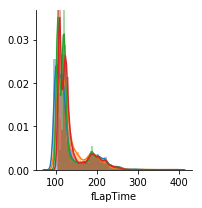

In [78]:
#sns.distplot( df.fLapTime[(df.fLapTime > 0) & (df.fLapTime < 400)])
#sns.plt.show()
 
# Control the number of bins
#sns.distplot( df["sepal_length"], bins=20 )
#sns.plt.show()

g = sns.FacetGrid(df[(df.fLapTime > 0) & (df.fLapTime < 400)], hue="Class")
g = g.map(sns.distplot, "fLapTime")

In [74]:
print("GTD")
print("Min Lap Time: ", df.fLapTime[(df.Class == "GTD")].min())
print("Max Lap Time: ", df.fLapTime[(df.Class == "GTD")].max())
print()
print("GTLM")
print("Min Lap Time: ", df.fLapTime[(df.Class == "GTLM")].min())
print("Max Lap Time: ", df.fLapTime[(df.Class == "GTLM")].max())
print()
print("P")
print("Min Lap Time: ", df.fLapTime[(df.Class == "P")].min())
print("Max Lap Time: ", df.fLapTime[(df.Class == "P")].max())


GTD
Min Lap Time:  80.507
Max Lap Time:  16009.969

GTLM
Min Lap Time:  103.385
Max Lap Time:  3802.037

P
Min Lap Time:  88.455
Max Lap Time:  21516.048
